In [249]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)




In [250]:
df = pd.read_csv('WHRData2021.csv')
df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    float64
 4   Median age                                                                   163 non-null    float64
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

In [252]:
df1 = df.drop(['All-cause death count, 2017','All-cause death count, 2018','All-cause death count, 2019','Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average','All-cause death count, 2020'
         ], axis=1)

df1.dropna(inplace=True)

df1.isnull().sum()

Country name                                                                   0
Population 2020                                                                0
Population 2019                                                                0
COVID-19 deaths per 100,000 population in 2020                                 0
Median age                                                                     0
Island                                                                         0
Index of exposure to COVID-19  infections in other countries as of March 31    0
Log of average distance to SARS countries                                      0
WHO Western Pacific Region                                                     0
Female head of government                                                      0
Index of institutional trust                                                   0
Gini coefficient of income                                                     0
dtype: int64

In [253]:
fig = px.scatter(df1, 
                 x='Median age', 
                 y='Gini coefficient of income', 
                 color='Country name',
                 trendline='ols',
                 trendline_scope='overall',
                 trendline_color_override='black'
                )
fig.show()

Here we notice that as the gini coefficient decreases median age increases and since a lower gini coefficient is directly proportion to lower wealth inequality, we can see that european countries have higher wealth equality than african countries.

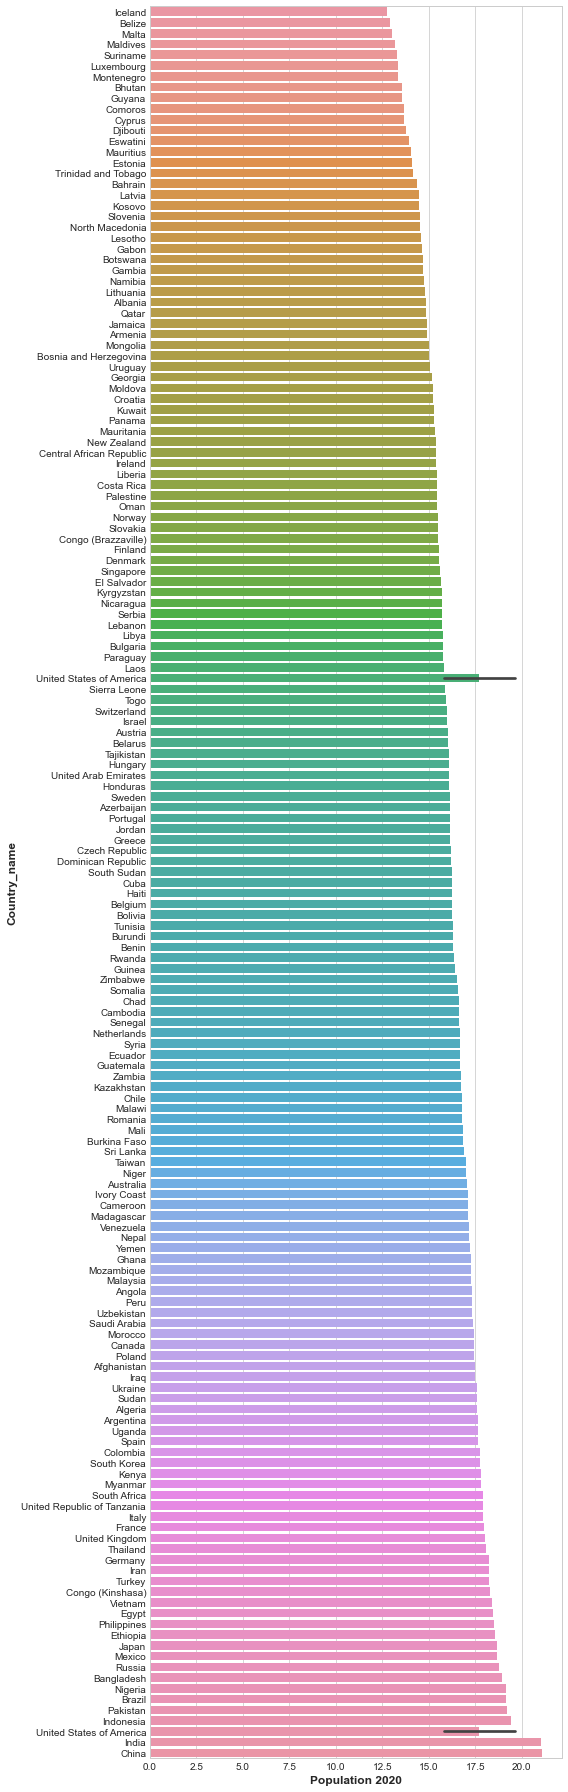

In [230]:
pop20 = np.log(df1['Population 2020'])
pop19 = np.log(df1['Population 2019'])

#pop_increase= np.log(df1['Population 2020']-df1['Population 2019'])
df1.rename(columns = {'Country name':'Country_name'}, inplace = True)
plt.figure(figsize=(8,25))
sns.barplot(y='Country_name', x=pop20, data=df1, order=df1.sort_values('Population 2020').Country_name)
plt.show()

The population in 2020 in an ascending order from the least to the highest populous.

Now lets see the difference in population between 2019 to 2020.

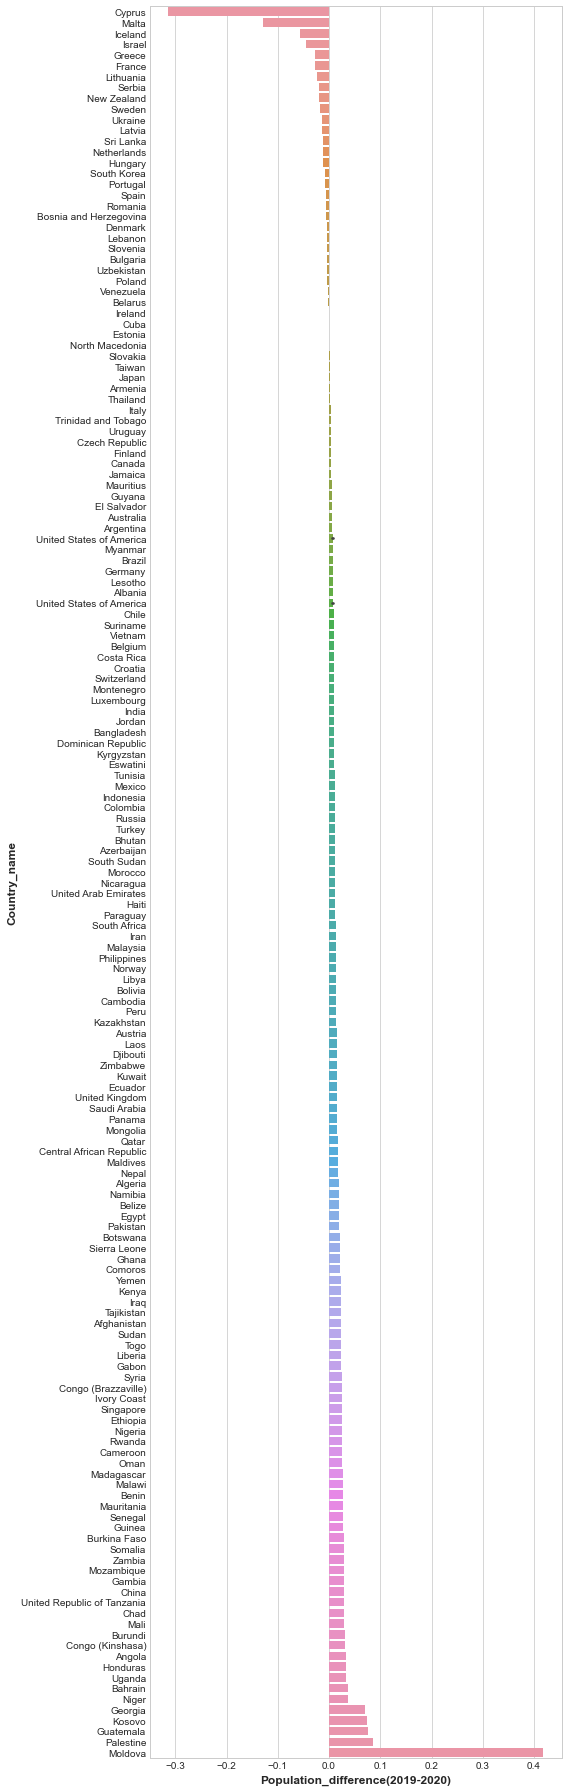

In [231]:
df1['Population_difference(2019-2020)']= np.log(df1['Population 2020'])-np.log(df1['Population 2019'])
plt.figure(figsize=(8,25))
sns.barplot(y='Country_name', x='Population_difference(2019-2020)', data=df1,order=df1.sort_values('Population_difference(2019-2020)').Country_name)
plt.show()

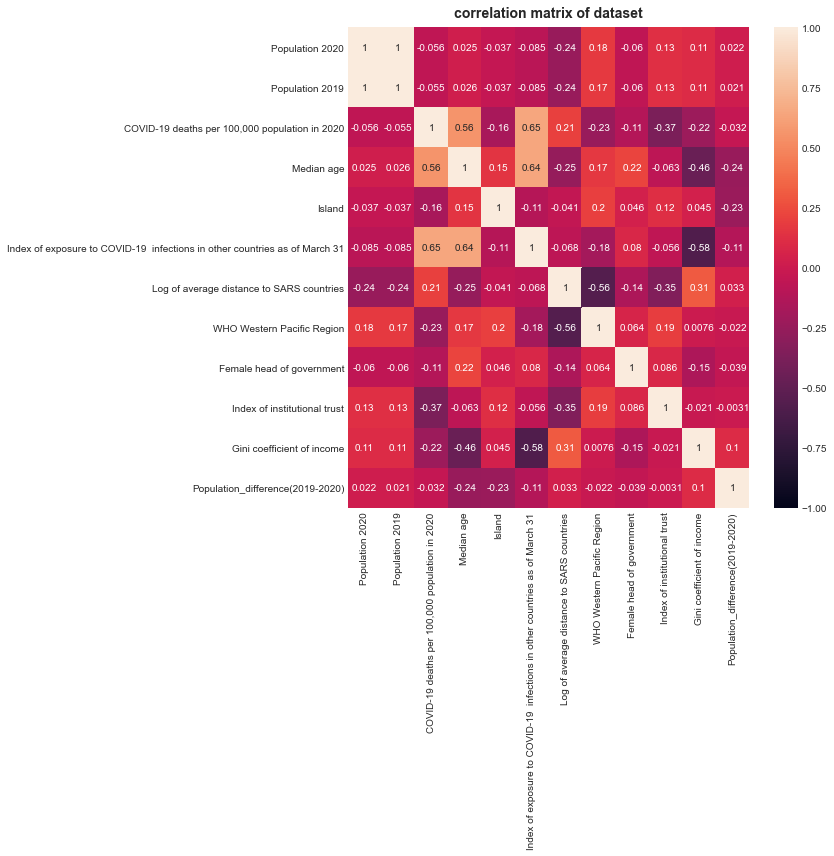

In [232]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), 
            vmin=-1, 
            vmax=1, 
            annot=True)

plt.title('correlation matrix of dataset')
plt.show()
